<a href="https://colab.research.google.com/github/Vigneswaran978/Deep-Learning-with-python/blob/master/functional_API_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except:
  pass

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.python.keras.utils.vis_utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
import random





In [3]:
# Watch advanced Tensfor flow technique - Course one week 1 (Siamese Network)

In [4]:
def create_pairs(x, digit_indices):
  pairs = []
  labels = []
  n = min([len(digit_indices[d]) for d in range(10)]) - 1
  for d in range(10):
    for i in range(n):
      z1, z2 = digit_indices[d][i], digit_indices[d][i+1]
      pairs += [[x[z1], x[z2]]]
      inc = random.randrange(1, 10)
      dn = (d+inc) % 10
      z1, z2 = digit_indices[d][i], digit_indices[dn][i]
      pairs += [[x[z1], x[z2]]]
      labels += [1, 0]
  return np.array(pairs), np.array(labels)



In [5]:
def create_pairs_on_set(images, labels):
  digit_indices = [np.where(labels == i)[0] for i in range(10)]
  pairs, y = create_pairs(images, digit_indices)
  y - y.astype('float32')
  return pairs, y

In [6]:
(train_images, train_labesl), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [7]:
train_images = train_images.astype('float32')
test_iamges = test_images.astype('float32')
train_images = train_images / 255
test_images = test_images / 255


In [8]:
tr_pairs, tr_y = create_pairs_on_set(train_images, train_labesl)
ts_pairs, ts_y = create_pairs_on_set(test_images, test_labels)


In [9]:
tr_pairs

array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0. 

In [10]:
def show_image(image):
  plt.figure()
  plt.imshow(image)
  plt.colorbar()
  plt.grid(False)
  plt.show()

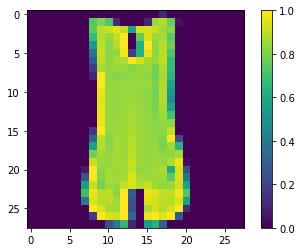

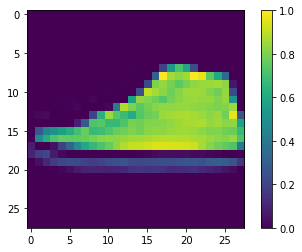

0


In [11]:
this_pair = 5
show_image(tr_pairs[this_pair][0])
show_image(tr_pairs[this_pair][1])
print(tr_y[this_pair])

In [12]:
def initialize_base_network():
  input = Input(shape = (28, 28,), name = 'base_input')
  x = Flatten(name = 'flatten_input')(input)
  x = Dense(128, activation= 'relu', name = 'first_base_dense')(x)
  x = Dropout(0.1, name = "first_dropout")(x)
  x = Dense(128, activation = 'relu', name = 'sendond_base_dense')(x)
  x = Dropout(0.1, name = "second_dropout")(x)
  x = Dense(128, activation = 'relu', name = 'third_base_dense')(x)
  return Model(inputs = input, outputs = x)
                                          

In [13]:
def euclidean_distance(vects):
  x, y = vects
  sum_square = K.sum(K.square(x-y), axis = 1, keepdims = True)
  return K.sqrt(K.maximum(sum_square, K.epsilon()))

In [14]:
def eucl_dist_output_shape(shapes):
  shape1, shape2 = shapes
  return(shape1[0], 1)

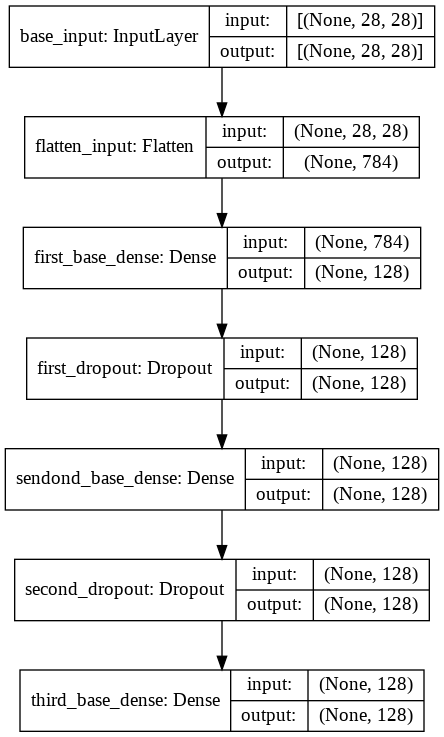

In [15]:
base_network = initialize_base_network()
plot_model(base_network, show_shapes=True, show_layer_names=True, to_file='base-model.png')

In [16]:
input_a = Input(shape = (28, 28, ), name = "left_input")
vect_output_a = base_network(input_a)
input_b = Input(shape=(28, 28,), name = "right_input")
vect_output_b = base_network(input_b)

In [17]:
output = Lambda(euclidean_distance, name = 'output_layer', output_shape = eucl_dist_output_shape)([vect_output_a, vect_output_b])
model = Model([input_a, input_b], output)

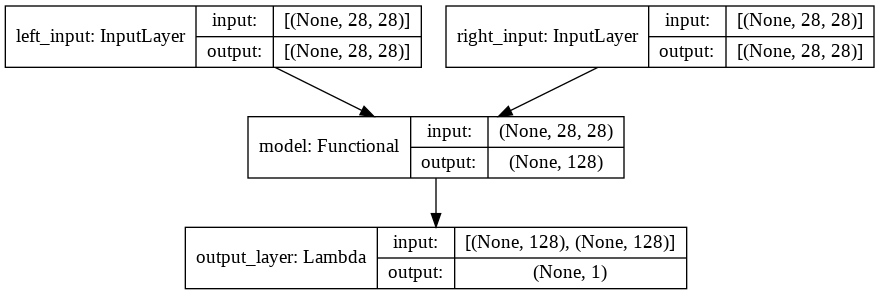

In [18]:
plot_model(model, show_shapes = True, show_layer_names = True, to_file = 'outer-model.png')

In [19]:
def contrastive_loss_with_margin(margin):
  def contrastive_loss(y_ture, y_pred):
    square_pred = K.square(y_pred)
    margin_square = K.square(k.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred +(1-y_ture) * margin_square)
  return contrastive_loss_with_margin


In [24]:
rms = RMSprop()
model.compile(loss = contrastive_loss_with_margin(margin = 1), optimizer= rms)
history = model.fit([tr_pairs[:, 0], tr_pairs[:, 1]], tr_y, epochs = 10, batch_size = 128, validation_data=([ts_pairs[:, 0], ts_pairs[:,1]], ts_y))
loss = model.evaluate(x = [ts_pairs[:, 0], ts_pairs[:, 1]], y = ts_y)

Epoch 1/10


TypeError: ignored

In [25]:
def compute_accuracy(y_true, y_pred):
  pred = y_pred.raven() > 0.5
  return np.mean(pread == y_true)
  

In [26]:
y_pred_train = model.predict([tr_pairs[:, 0], tr_pairs[:, 1]])
train_accuracy = compute_accuracy(tr_y, y_pred_train)


AttributeError: ignored

In [ ]:
y_pred_test = model.predict([ts_pairs[:, 0], ts_pairs[:, 1]])
test_accuracy = compute_accuracy(ts_y, y_pred_test)
 
                            

In [ ]:
def plot_metrics(metric_name, title, ylim = 5):
  plt.title(title)
  plt.ylim(0, ylim)
  plt.plot(history.history[metric_name], color = 'blue', label = metric_name)
  plt.plot(history.history['val_'+metric_name], color = 'green', label = 'val_' + metric_name)

In [ ]:
plot_metrics(metric_name = 'loss', title = 'loss', ylim = 0.2)

In [ ]:
def visualize_images():
  plt.rc('image', cmap = 'gray-r')
  plt.rc('grid', linewidth = 0)
  plt.rc('xtick', top = False, bottom = False, labelsize = 'large')
  #ohter cosmetics to be added'

# New Section